## Create Kmeans Elbow Curve & Clustering Graph

In [322]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import pylab as pl

#Import data
hotels = pd.read_csv('hotel_data.csv')
activity = pd.read_csv('activity_data.csv')

In [323]:
#Clean data to get rid of NaN and categorical variables through ones hot encoding
#df.loc[df['city_name'] == 'Brookyln']
df = hotels.loc[hotels['city_name'] == 'New York City']
df = pd.get_dummies(data=hotels, columns=['hotel_type','parent_brand_name'])
df.dropna(inplace = True)
df.drop(['hotel_id','hotel_name','brand_name','city_name'],axis = 1,inplace = True)

In [324]:
#Scale values from 0 to 1
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [325]:
#Cluster the data
clmns = list(df)
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i, random_state=0) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

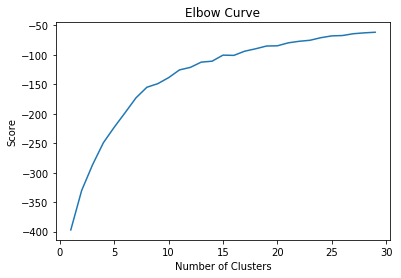

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 402 samples in 0.001s...
[t-SNE] Computed neighbors for 402 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 402 / 402
[t-SNE] Mean sigma: 0.287636
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.138424
[t-SNE] KL divergence after 300 iterations: 0.171588


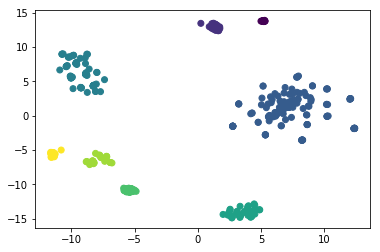

In [326]:
#Plot Elbow Curve
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

clmns = list(df)
kmeans = KMeans(n_clusters = 8, random_state = 0)
kmeans.fit(df)
labels = kmeans.labels_

#Find centers
centers = np.array(kmeans.cluster_centers_)

#Glue back to original data
df['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
df.groupby(['clusters']).mean()

#run the clusters on a T sne 
tsne = TSNE(n_components = 2, verbose = 1 , perplexity = 40, n_iter=300)
output = tsne.fit_transform(df.loc[:])

#visualize clusters
list1 = [i[0] for i in output]
list2 = [i[1] for i in output]
plt.scatter(list1,list2, c = labels)

## Export clusters

In [328]:
pd.DataFrame(centers).to_csv(r'centers.csv')

## Clean Data

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import pylab as pl

#Import data
hotels = pd.read_csv('hotel_data.csv')
activity = pd.read_csv('activity_data.csv')

#Clean data to get rid of NaN and categorical variables through ones hot encoding
df = pd.get_dummies(data=hotels, columns=['hotel_type','city_name','parent_brand_name'])
df.dropna(inplace = True)
df.drop(['hotel_id','hotel_name','brand_name'],axis = 1,inplace = True)

#Scale values from 0 to 1
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [318]:
df = pd.read_pickle('hotels.pkl')

In [319]:
df

,1858923.0,12297961.0,2079052.0,3235844.0,601762.0,99387.0,99302.0,208455.0,93358.0,12934485.0,...,281071.0,4799063.0,209382.0,3973287.0,113343.0,234762.0,1464151.0,6899174.0,3168954.0,5960548.0
hotel_id,,,,,,,,,,,,,,,,,,,,,
75688.0,0.004182,0.005297,0.106496,0.024812,0.009479,0.024254,0.026485,0.011430,0.032897,0.016727,...,0.005576,0.010873,0.007806,0.004182,0.003624,0.010594,0.004182,0.001394,0.002788,0.006412
75711.0,0.004900,0.002614,0.074812,0.020255,0.011761,0.011107,0.008821,0.002123,0.040673,0.012578,...,0.000817,0.010291,0.019111,0.001470,0.022542,0.000980,0.007187,0.002450,0.003430,0.003104
80075.0,0.003430,0.002668,0.067073,0.034299,0.016006,0.007622,0.031250,0.001905,0.047256,0.018293,...,0.000762,0.001524,0.008003,0.003430,0.012576,0.000381,0.009909,0.003430,0.005716,0.004573
80110.0,0.005719,0.003119,0.070445,0.013517,0.007538,0.053028,0.014557,0.019756,0.013517,0.051729,...,0.000260,0.009618,0.021315,0.002080,0.004679,0.007538,0.002599,0.000780,0.001040,0.001820
93333.0,0.007928,0.007550,0.060778,0.021895,0.018875,0.030955,0.016233,0.001133,0.035108,0.024160,...,0.003775,0.001133,0.007928,0.003398,0.023028,0.000000,0.004530,0.006418,0.004530,0.003775
93334.0,0.005159,0.004690,0.062852,0.015478,0.012664,0.013602,0.017355,0.005159,0.027674,0.013133,...,0.004221,0.003283,0.004690,0.004221,0.020169,0.003752,0.004221,0.006098,0.003752,0.006567
93335.0,0.001080,0.003240,0.098092,0.014039,0.006299,0.060655,0.023398,0.040497,0.009719,0.016559,...,0.003960,0.011879,0.008459,0.003240,0.001620,0.011879,0.001980,0.000540,0.000540,0.007559
93338.0,0.001132,0.003585,0.073962,0.017925,0.013208,0.019623,0.018679,0.012075,0.019434,0.016981,...,0.005660,0.012075,0.006604,0.002642,0.009623,0.011132,0.002453,0.001132,0.002453,0.002453
93339.0,0.010259,0.005386,0.068992,0.031547,0.007694,0.015132,0.019492,0.002821,0.067966,0.023852,...,0.000769,0.003078,0.038215,0.001282,0.043857,0.000513,0.013337,0.004104,0.009233,0.010259


In [330]:
pd.DataFrame(df).to_csv(r'hotel_hotel.csv')